## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics
import sklearn.svm
import sklearn.tree
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import sklearn.preprocessing
import sklearn.decomposition
import imblearn.over_sampling
import plotly.express as px

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [2]:
Booking_Data = pd.read_csv('Dataset/hotel_bookings.csv')
Booking_Data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print(Booking_Data.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
print(Booking_Data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [5]:
print(Booking_Data.shape)

(119390, 32)


## Splitting the dataset in to Train and Test Test

In [6]:
Booking_Data_Train, Booking_Data_Test = sklearn.model_selection.train_test_split(Booking_Data)
print("Booking_Data_Train:", Booking_Data_Train.shape)
print("Booking_Data_Test:", Booking_Data_Test.shape)

Booking_Data_Train: (89542, 32)
Booking_Data_Test: (29848, 32)


## Data Exploration on Training Set

#### Lets explore what are the key features of the given dataset which provides a heads up to our Hotel Management

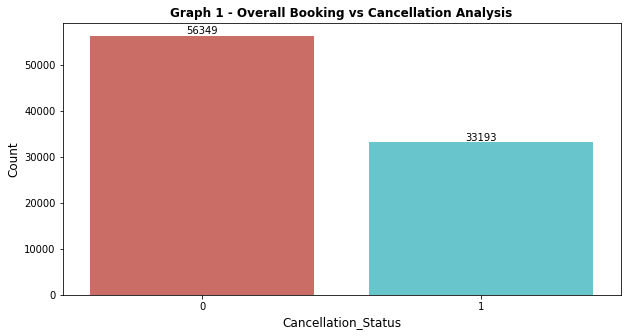

In [7]:
plt.figure(figsize=(10,5))
Cancellation_Analysis = sns.countplot(x='is_canceled', data = Booking_Data_Train, palette="hls")
plt.title('Graph 1 - Overall Booking vs Cancellation Analysis', weight='bold')
plt.xlabel('is_canceled', size = 12)
plt.ylabel('Count', size = 12)
plt.xlabel('Cancellation_Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i in Cancellation_Analysis.containers:
    Cancellation_Analysis.bar_label(i,)

From the above graph we see that

- 63% i.e. 56417 reservations bookings are checkedout
- 37% i.e. 33125 reservations are cancelled (Either cancelled or no-show)

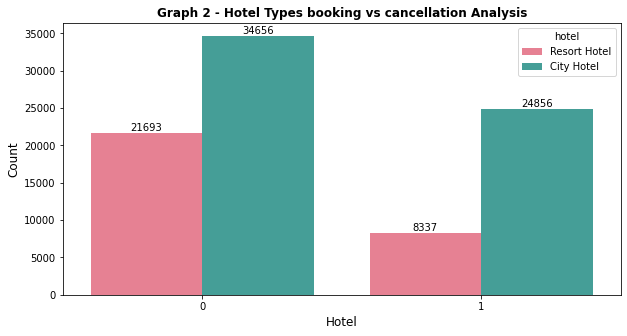

In [8]:
## Hotel_Type_Analysis Cancellation and Booking Analysis

plt.figure(figsize=(10,5))
Hotel_Types = sns.countplot(x='is_canceled', hue='hotel', data = Booking_Data_Train, palette="husl")
plt.title('Graph 2 - Hotel Types booking vs cancellation Analysis', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i in Hotel_Types.containers:
    Hotel_Types.bar_label(i,)

In [9]:
Market_Segment_Analysis = Booking_Data_Train[['country', 'is_canceled']]
Market_Segment_Analysis.nunique()

Market_Segment_Analysis = list=(Booking_Data_Train.country.value_counts(ascending=False))
Market_Segment_Analysis.head(10)

PRT    36435
GBR     9092
FRA     7819
ESP     6389
DEU     5474
ITA     2856
IRL     2506
BEL     1751
BRA     1690
NLD     1586
Name: country, dtype: int64

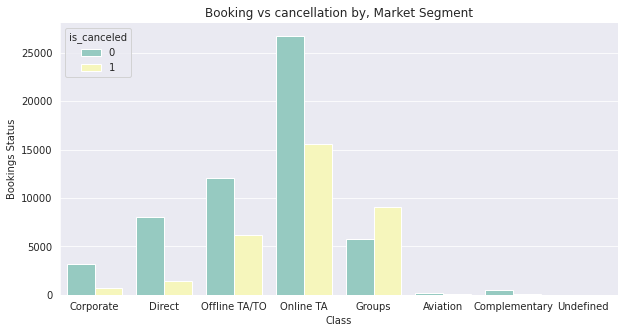

In [10]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.set_palette('Set3')
sns.countplot(data=Booking_Data_Train, x="market_segment", hue='is_canceled')
plt.title('Booking vs cancellation by, Market Segment')
plt.xlabel('Class')
plt.ylabel('Bookings Status')
sns.despine()
plt.show()

Using correlation matrix to understand which features are very important for our model and remove the unwanted features from the dataframe

In [11]:
Booking_Data_Train.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292951,0.016365,0.008086,-0.004924,-0.000639,0.024255,0.061001,0.003051,-0.031715,-0.084597,0.110097,-0.056621,-0.142431,-0.084598,-0.028181,0.052532,0.046326,-0.195339,-0.233266
lead_time,0.292951,1.000000,0.039370,0.126007,0.000441,0.083768,0.163909,0.121998,-0.039462,-0.021640,-0.122441,0.085800,-0.073104,-0.000524,-0.069422,0.151114,0.167548,-0.062264,-0.114425,-0.096510
arrival_date_year,0.016365,0.039370,1.000000,-0.540906,-0.000418,0.017529,0.027902,0.028344,0.053677,-0.011599,0.010804,-0.120096,0.028859,0.029890,0.062562,0.259001,-0.056777,0.194487,-0.013378,0.107760
arrival_date_week_number,0.008086,0.126007,-0.540906,1.000000,0.068270,0.020365,0.016852,0.027104,0.006694,0.008863,-0.031451,0.034886,-0.021274,0.005041,-0.029932,-0.065189,0.023453,0.076460,0.001473,0.027092
arrival_date_day_of_month,-0.004924,0.000441,-0.000418,0.068270,1.000000,-0.016609,-0.027922,-0.002463,0.016717,0.000910,-0.004802,-0.027264,0.000091,0.009048,0.002099,0.049398,0.022629,0.030911,0.010841,0.005697
stays_in_weekend_nights,-0.000639,0.083768,0.017529,0.020365,-0.016609,1.000000,0.499387,0.093484,0.043589,0.018013,-0.087220,-0.013375,-0.043018,0.062113,0.144848,0.057550,-0.053432,0.047029,-0.020099,0.072223
stays_in_week_nights,0.024255,0.163909,0.027902,0.016852,-0.027922,0.499387,1.000000,0.094601,0.040449,0.019138,-0.095657,-0.016943,-0.048303,0.094327,0.186186,0.173875,-0.002525,0.065069,-0.023518,0.069812
adults,0.061001,0.121998,0.028344,0.027104,-0.002463,0.093484,0.094601,1.000000,0.028674,0.017968,-0.144407,-0.007433,-0.108255,-0.052291,-0.032795,0.205021,-0.009348,0.226944,0.015957,0.122328
children,0.003051,-0.039462,0.053677,0.006694,0.016717,0.043589,0.040449,0.028674,1.000000,0.025449,-0.032664,-0.025053,-0.021114,0.049720,0.040586,0.032598,-0.033231,0.320675,0.056411,0.084122
babies,-0.031715,-0.021640,-0.011599,0.008863,0.000910,0.018013,0.019138,0.017968,0.025449,1.000000,-0.009414,-0.007234,-0.006422,0.081681,0.035457,0.010367,-0.010368,0.031797,0.038134,0.091209


In [12]:
Booking_Data_Train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,89539.000000,89542.000000,89542.000000,89542.000000,89542.000000,89542.000000,77301.000000,5065.000000,89542.000000,89542.000000,89542.000000,89542.000000
mean,0.370698,103.903062,2016.156720,27.146557,15.787374,0.930547,2.504523,1.855342,0.103899,0.007963,0.032074,0.087601,0.139823,0.221896,86.521779,190.617769,2.289652,101.883386,0.062742,0.570861
std,0.482994,106.722398,0.709277,13.613338,8.782113,1.000335,1.913625,0.578300,0.398578,0.100107,0.176199,0.839925,1.523280,0.658035,110.667329,132.256390,17.264571,51.348941,0.246518,0.792564
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,69.260000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.610000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


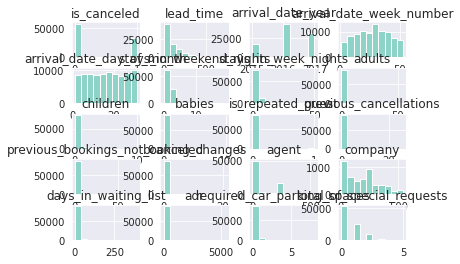

In [13]:
Booking_Data_Train.hist()

### Understanding if the our Training Data set class is balanced or imbalanced

Our current prediction model class outlined in the given data is stored in the column "is_Cancelled" 
- 0 means Reservation is Checked out
- 1 means Reservation is cancelled

The following graphical representation outlines if our data set is balanced or not

AxesSubplot(0.125,0.125;0.775x0.755)
0    56349
1    33193
Name: is_canceled, dtype: int64


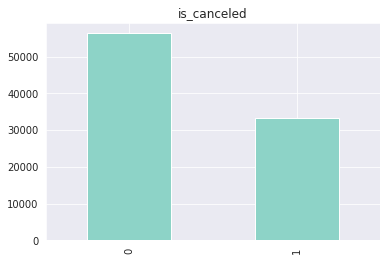

In [14]:
Target_Label = list=(Booking_Data_Train.is_canceled.value_counts(ascending=False))
print(Target_Label.plot.bar())
print(Target_Label.sort_values(ascending=False))
Graph1 = plt.title('is_canceled')

Inference : Based on the data collected when we checked the Target Label balance or imbalance check 

- 63% i.e. 56417 reservations bookings are checkedout
- 37% i.e. 33125 reservations are cancelled (Either cancelled or no-show)

This means that the current Training dataset's Target Label is not having a balanced set of classes, will eventually lead the our model to encounter bias. However we need to address this in the feature engineering to ensure that our model is not biased.

## Data Preprocessing

#### Activity 1 : identifying the null value in the given dataset

In [15]:
print(Booking_Data_Train.shape)
print(Booking_Data_Train.isnull().sum())

(89542, 32)
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             361
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12241
company                     

On the above grid when ran the python program to identify the null values we see that the following columns have the nullvalues

- **# of Rows**    : 89542
- **# of Columns** : 32


- Children : 3
- Country  : 380
- Agent    : 12150
- Company  : 84497

#### Deleting the coloumn with the Missing data 

In [16]:
Updated_Training_Df = Booking_Data_Train.dropna(axis=1)
print(Updated_Training_Df.shape)
print(Updated_Training_Df.isnull().sum())

(89542, 28)
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_stat

Now that we have deleted the columns which had null values the overall shape of the training dataset is as below

- **# of Rows**    : 89542
- **# of Columns** : 28

In [17]:
Updated_Test_Df = Booking_Data_Test.dropna(axis=1)
print(Updated_Test_Df.shape)
print(Updated_Test_Df.isnull().sum())

(29848, 28)
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_stat

## Splitting the Features and Target Labels

In [18]:
Booking_x_train = Updated_Training_Df.drop(["is_canceled"], axis=1)
Booking_y_train = Updated_Training_Df["is_canceled"]
print("Booking_x_train:", Booking_x_train.shape)
print("Booking_y_train:", Booking_y_train.shape)

Booking_x_test = Updated_Test_Df.drop(["is_canceled"], axis=1)
Booking_y_test = Updated_Test_Df["is_canceled"]
print("Booking_x_test:", Booking_x_test.shape)
print("Booking_y_test:", Booking_y_test.shape)

Booking_x_train: (89542, 27)
Booking_y_train: (89542,)
Booking_x_test: (29848, 27)
Booking_y_test: (29848,)


## Featuring Engineering

In [19]:
encode = sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore")
encode.fit(Booking_x_train)

## Encoding the Categorical attributes to numerical data for Training data


Booking_x_train_encoded = encode.transform(Booking_x_train).toarray()

## Encoding the Categorical attributes to numerical data for Test data

Booking_x_test_encoded = encode.transform(Booking_x_test).toarray()

print("Booking_x_train_encoded:", Booking_x_train_encoded.shape)
print("Booking_x_test_encoded:", Booking_x_test_encoded.shape)

Booking_x_train_encoded: (89542, 9549)
Booking_x_test_encoded: (29848, 9549)


###  Standardization

In [20]:
# Building a standardization model
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(Booking_x_train_encoded)

# scaling the training features
x_train_standardized = scaler.transform(Booking_x_train_encoded)

# Reducing the number of test features
x_test_standardized = scaler.transform(Booking_x_test_encoded)

print("x_train_standardized:", x_train_standardized.shape)
print("x_test_standardized:", x_test_standardized.shape)

x_train_standardized: (89542, 9549)
x_test_standardized: (29848, 9549)


###  Dimensionality Reduction

In [21]:
# Building a PCA model
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(x_train_standardized)

# Reducing the number of training features
x_train_reduced = pca.transform(x_train_standardized)

# Reducing the number of test features
x_test_reduced = pca.transform(x_test_standardized)

print("x_train_reduced:", x_train_reduced.shape)
print("x_test_reduced:", x_test_reduced.shape)

x_train_reduced: (89542, 100)
x_test_reduced: (29848, 100)


### Oversampling

In [22]:
sm = imblearn.over_sampling.SMOTE() 
x_train_balanced, y_train_balanced = sm.fit_resample(x_train_reduced, Booking_y_train)
y_train_balanced.value_counts()

0    56349
1    56349
Name: is_canceled, dtype: int64

# Training The Model

#### Model 1 : Logistic Regression Model

In [23]:
Model_1 = sklearn.linear_model.LogisticRegression()
Model_1.fit(x_train_reduced, Booking_y_train)

LogisticRegression()

In [24]:
y_predicted = Model_1.predict(x_test_reduced)
Model_1_accuracy = sklearn.metrics.accuracy_score(Booking_y_test, y_predicted)
print('Logistic Model Accuracy Score:', Model_1_accuracy)
cm = confusion_matrix(Booking_y_test, y_predicted)

Logistic Model Accuracy Score: 0.9694451889573841


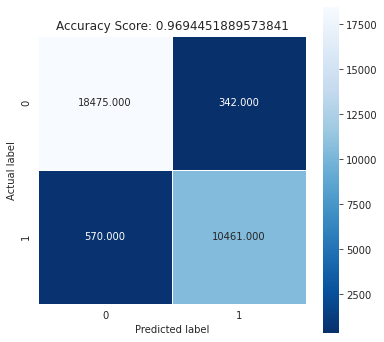

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Model_1_accuracy)
plt.title(all_sample_title, size = 12);

In [26]:
## Model Evaluation by using other performance Metrics

print(classification_report(Booking_y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18817
           1       0.97      0.95      0.96     11031

    accuracy                           0.97     29848
   macro avg       0.97      0.97      0.97     29848
weighted avg       0.97      0.97      0.97     29848



#### Model 2 : Decision Tree Model

In [27]:
Model_2 = sklearn.tree.DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=20)
Model_2.fit(x_train_reduced, Booking_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [28]:
y_predicted_2 = Model_2.predict(x_test_reduced)
Model_2_accuracy = sklearn.metrics.accuracy_score(Booking_y_test, y_predicted_2)
print('Decision Tree Accuracy Score:', Model_2_accuracy)
cm2 = confusion_matrix(Booking_y_test, y_predicted_2)

Decision Tree Accuracy Score: 0.9417716429911552


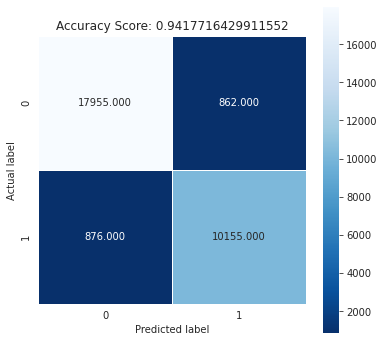

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Model_2_accuracy)
plt.title(all_sample_title, size = 12);

In [30]:
print(classification_report(Booking_y_test, y_predicted_2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     18817
           1       0.92      0.92      0.92     11031

    accuracy                           0.94     29848
   macro avg       0.94      0.94      0.94     29848
weighted avg       0.94      0.94      0.94     29848



#### Model 3 : KNN Model

In [31]:
Model_3 = sklearn.neighbors.KNeighborsClassifier()
Model_3.fit(x_train_reduced, Booking_y_train)

KNeighborsClassifier()

In [32]:
y_predicted_3 = Model_3.predict(x_test_reduced)
Model_3_accuracy = sklearn.metrics.accuracy_score(Booking_y_test, y_predicted_3)
print('KNN Accuracy Score:', Model_3_accuracy)
cm3 = confusion_matrix(Booking_y_test, y_predicted_3)

KNN Accuracy Score: 0.931184668989547


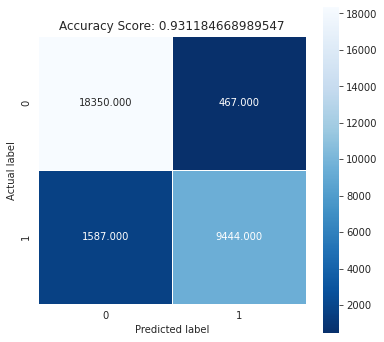

In [33]:
plt.figure(figsize=(6,6))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Model_3_accuracy)
plt.title(all_sample_title, size = 12);

In [34]:
print(classification_report(Booking_y_test, y_predicted_3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18817
           1       0.95      0.86      0.90     11031

    accuracy                           0.93     29848
   macro avg       0.94      0.92      0.92     29848
weighted avg       0.93      0.93      0.93     29848



## Key Features of which are helping us to predict the model

In [35]:
Updated_Training_Df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292951,0.016365,0.008086,-0.004924,-0.000639,0.024255,0.061001,-0.031715,-0.084597,0.110097,-0.056621,-0.142431,0.052532,0.046326,-0.195339,-0.233266
lead_time,0.292951,1.000000,0.039370,0.126007,0.000441,0.083768,0.163909,0.121998,-0.021640,-0.122441,0.085800,-0.073104,-0.000524,0.167548,-0.062264,-0.114425,-0.096510
arrival_date_year,0.016365,0.039370,1.000000,-0.540906,-0.000418,0.017529,0.027902,0.028344,-0.011599,0.010804,-0.120096,0.028859,0.029890,-0.056777,0.194487,-0.013378,0.107760
arrival_date_week_number,0.008086,0.126007,-0.540906,1.000000,0.068270,0.020365,0.016852,0.027104,0.008863,-0.031451,0.034886,-0.021274,0.005041,0.023453,0.076460,0.001473,0.027092
arrival_date_day_of_month,-0.004924,0.000441,-0.000418,0.068270,1.000000,-0.016609,-0.027922,-0.002463,0.000910,-0.004802,-0.027264,0.000091,0.009048,0.022629,0.030911,0.010841,0.005697
stays_in_weekend_nights,-0.000639,0.083768,0.017529,0.020365,-0.016609,1.000000,0.499387,0.093484,0.018013,-0.087220,-0.013375,-0.043018,0.062113,-0.053432,0.047029,-0.020099,0.072223
stays_in_week_nights,0.024255,0.163909,0.027902,0.016852,-0.027922,0.499387,1.000000,0.094601,0.019138,-0.095657,-0.016943,-0.048303,0.094327,-0.002525,0.065069,-0.023518,0.069812
adults,0.061001,0.121998,0.028344,0.027104,-0.002463,0.093484,0.094601,1.000000,0.017968,-0.144407,-0.007433,-0.108255,-0.052291,-0.009348,0.226944,0.015957,0.122328
babies,-0.031715,-0.021640,-0.011599,0.008863,0.000910,0.018013,0.019138,0.017968,1.000000,-0.009414,-0.007234,-0.006422,0.081681,-0.010368,0.031797,0.038134,0.091209
is_repeated_guest,-0.084597,-0.122441,0.010804,-0.031451,-0.004802,-0.087220,-0.095657,-0.144407,-0.009414,1.000000,0.084399,0.420402,0.011820,-0.022593,-0.131691,0.076313,0.013634
